<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231%20ALK%20-%20213BTMRVP%20Inferential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# 데이터 전처리

In [117]:
data_origin = pd.read_csv('/content/drive/MyDrive/#1 ALK RVP CSV.csv', index_col = 0)
data_origin.info()
data_origin.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2014-09-16 to 2022-05-17
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RVP_LAB         2708 non-null   float64
 1   S.B5.213TI2804  2708 non-null   float64
 2   S.B5.213PI2806  2708 non-null   float64
 3   S.B5.213FC2602  2708 non-null   float64
dtypes: float64(4)
memory usage: 105.8+ KB


,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806,S.B5.213FC2602
count,2708.000000,2708.000000,2708.000000,2708.000000
mean,39.308013,133.969684,335.047833,85.923927
std,3.406074,3.452283,29.851255,10.770634
min,28.500000,97.606803,291.821242,35.510519
25%,37.400000,131.998333,318.077753,80.966155
50%,39.000000,133.436735,325.511703,88.584186
75%,40.700000,136.158762,338.359004,92.780427
max,98.600000,145.939417,520.512731,113.968771


In [110]:
data_origin

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
2014-09-16,35.5,136.582564,335.836740
2014-09-17,33.5,138.822292,338.164993
2014-09-18,34.4,138.079717,339.017050
2014-09-19,34.3,137.367731,335.839848
2014-09-20,35.2,137.442057,349.710404
...,...,...,...
2022-05-13,43.7,127.127323,326.187806
2022-05-14,49.9,123.287827,321.014425
2022-05-15,48.7,125.099084,332.709037
2022-05-16,51.0,122.406470,325.956086


In [135]:
data_origin.columns = ['RVP', 'T', 'P', 'F']
data = data_origin[data_origin['RVP'] < 70]
# data = data_origin[data_origin['RVP'] < 70].sort_values(by = 'RVP')
# data.reset_index(drop = True, inplace = True)
data

,RVP,T,P,F
2014-09-16,35.5,136.582564,335.836740,89.956760
2014-09-17,33.5,138.822292,338.164993,89.462762
2014-09-18,34.4,138.079717,339.017050,91.780995
2014-09-19,34.3,137.367731,335.839848,96.444227
2014-09-20,35.2,137.442057,349.710404,91.365322
...,...,...,...,...
2022-05-13,43.7,127.127323,326.187806,84.417961
2022-05-14,49.9,123.287827,321.014425,96.055985
2022-05-15,48.7,125.099084,332.709037,92.796671
2022-05-16,51.0,122.406470,325.956086,95.187382


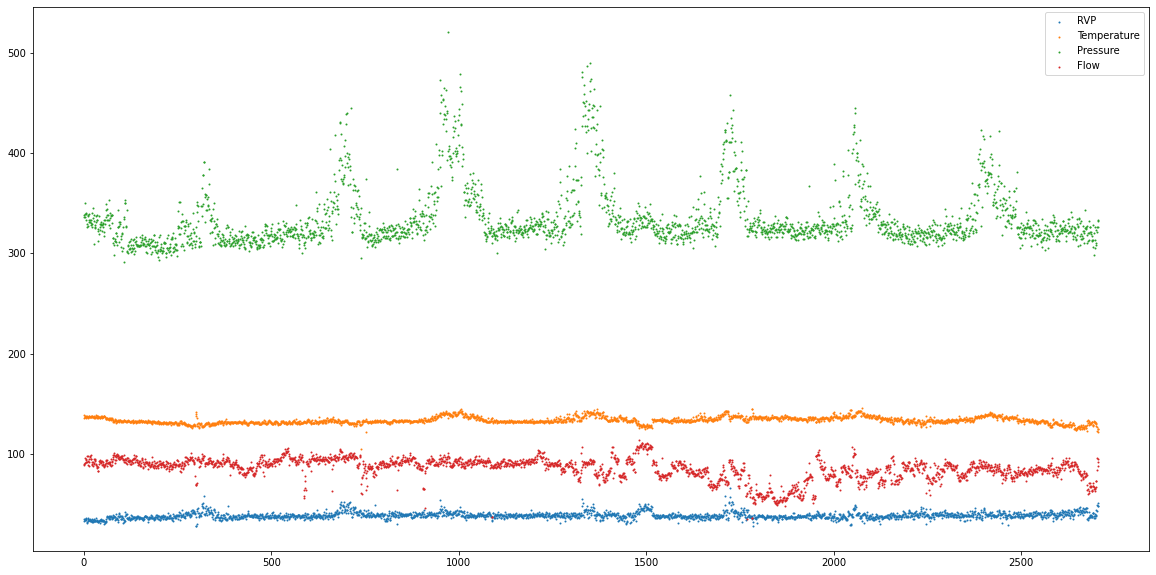

In [136]:
plt.figure(figsize = (20, 10))
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 0], label = 'RVP', s = 1)
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 1], label = 'Temperature', s = 1)
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 2], label = 'Pressure', s = 1)
plt.scatter(np.arange(data.shape[0]), data.iloc[:, 3], label = 'Flow', s = 1)
plt.legend()
plt.show()

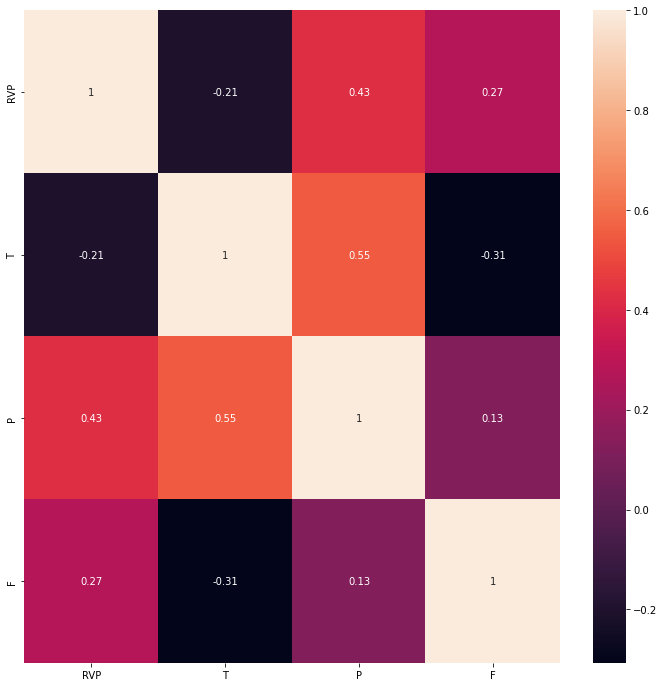

In [137]:
plt.figure(figsize = (12, 12))
sns.heatmap(data.corr(), linecolor = 'white', annot = True)
plt.show()

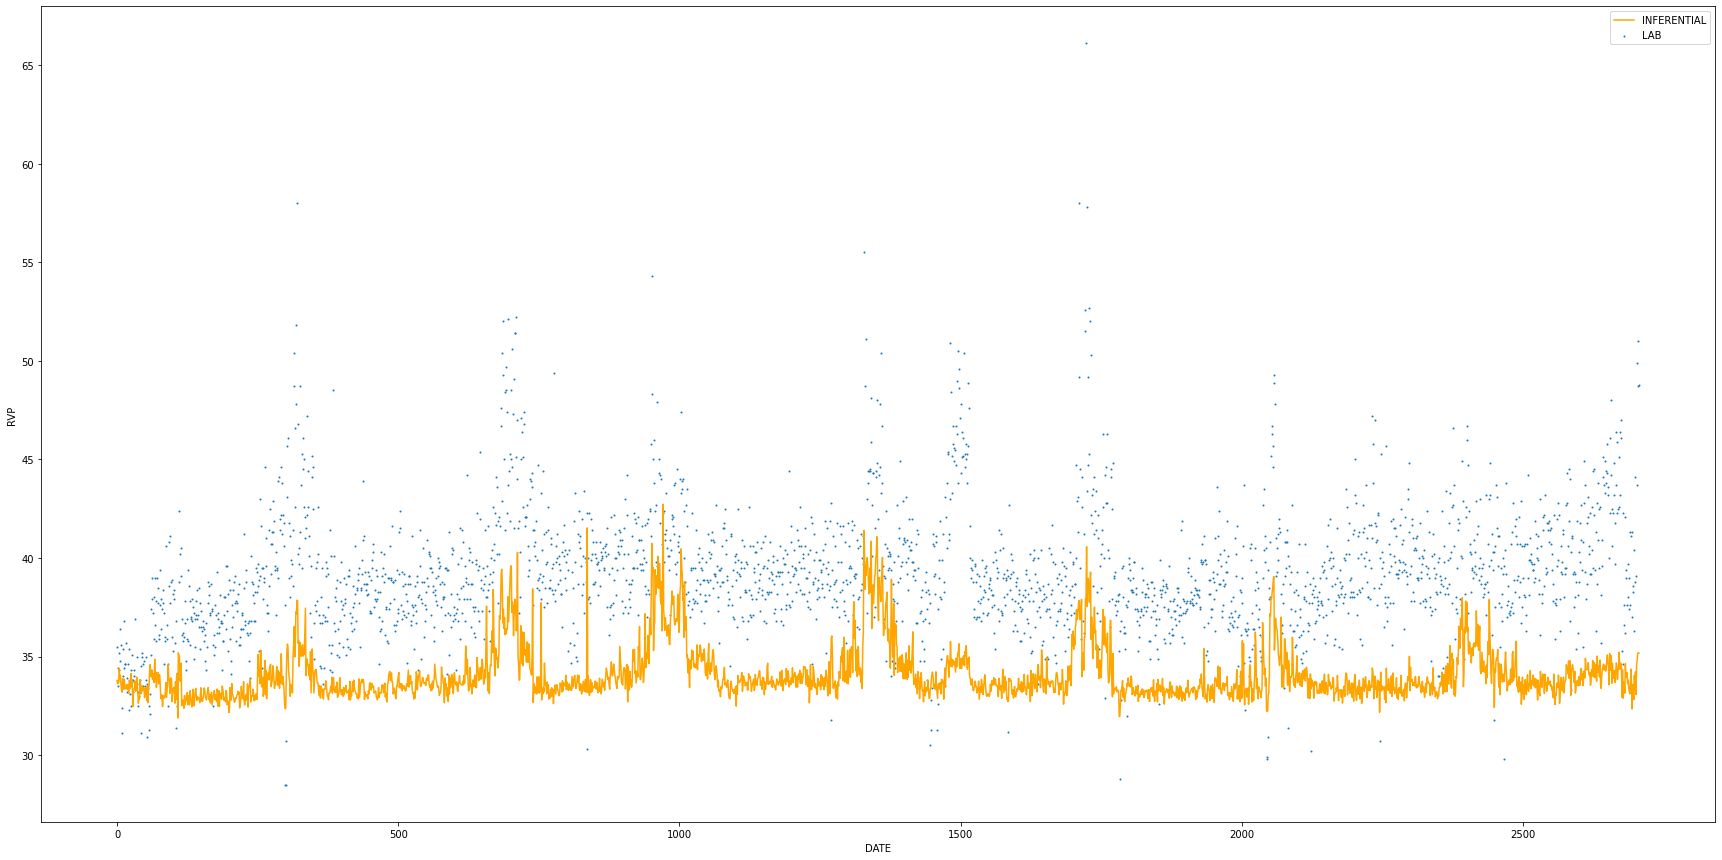

In [138]:
a1 = -0.1343
a2 = 0.0520
b = 34.671
inferential = a1 * data['T'] + a2 * data['P'] + b
length = data.shape[0]

plt.figure(figsize = (30, 15))
plt.scatter(np.arange(length), data['RVP'], s = 1, label = 'LAB')
plt.plot(np.arange(length), inferential, color='orange', label = 'INFERENTIAL')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [139]:
input = data.iloc[:, 1:]
input_log = np.log10(input)
input_log.columns = ['logT', 'logP', 'logF']
input_log

,logT,logP,logF
2014-09-16,2.135395,2.526128,1.954034
2014-09-17,2.142459,2.529129,1.951642
2014-09-18,2.140130,2.530222,1.962753
2014-09-19,2.137885,2.526132,1.984276
2014-09-20,2.138120,2.543709,1.960781
...,...,...,...
2022-05-13,2.104239,2.513468,1.926435
2022-05-14,2.090920,2.506525,1.982524
2022-05-15,2.097254,2.522065,1.967532
2022-05-16,2.087804,2.513159,1.978579


In [140]:
pf = PolynomialFeatures(include_bias = False, degree = 2)
pf.fit(input)
input_poly = pf.transform(input)
input_poly.shape
# input_poly_pd = pd.DataFrame(input_poly, columns = ['T1', 'P1', 'T2', 'T1P1', 'P2', 'T3', 'T2P1', 'T1P2', 'P3'])
# input_poly_log = pd.concat([input_poly_pd, input_log], axis = 1)
# input_poly_log

(2707, 9)

In [141]:
target = data.iloc[:, 0]
target.shape

(2707,)

In [142]:
train_input, test_input, train_target, test_target = tts(input_poly, target, test_size = 0.1)

In [143]:
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print(lr.coef_)
print(lr.intercept_)

0.5571296845561855
0.5216025485545912
[ 3.50023568e+00 -2.10939687e-01  2.09152781e+00 -1.43508934e-02
  3.25030542e-03 -1.76968862e-02 -3.62209878e-04  1.47857575e-03
 -1.44696693e-03]
-214.28831982033796


In [144]:
a = lr.coef_
b = lr.intercept_
result = np.sum(a * input_poly, axis = 1) + b
print(result.shape)
result

(2707,)


array([37.13952057, 35.36864034, 35.92407274, ..., 45.8434561 ,
       47.23831651, 45.35432198])

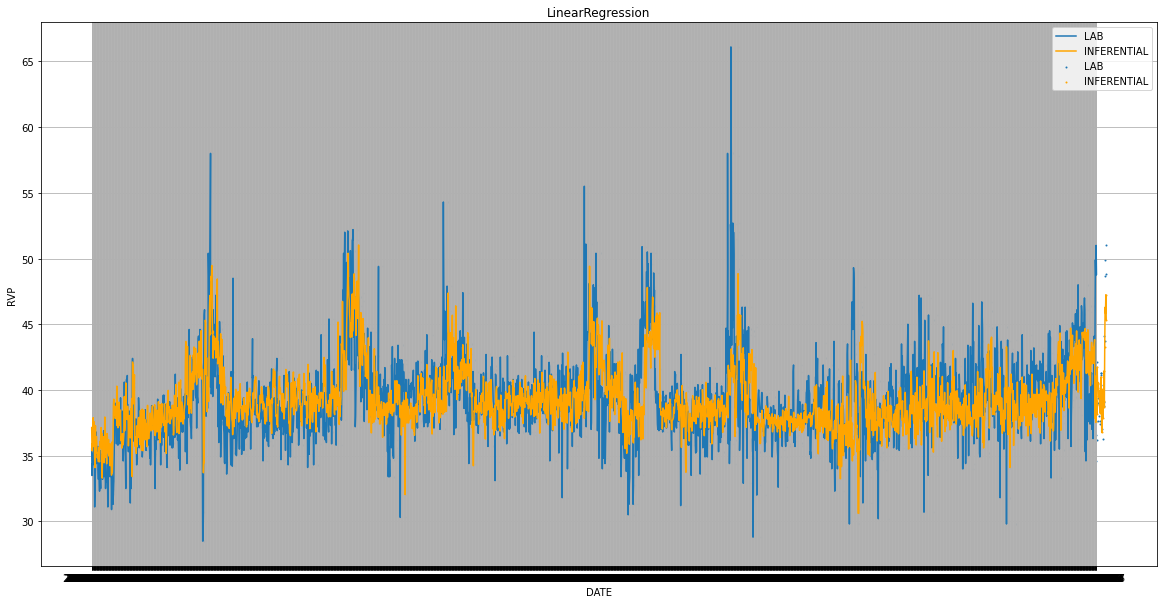

In [147]:
plt.figure(figsize = (20, 10))
plt.scatter(np.arange(length), data['RVP'], label = 'LAB', s = 1)
plt.scatter(np.arange(length), result, label = 'INFERENTIAL', s = 1, color = 'orange')
plt.plot(data['RVP'], label = 'LAB')
plt.plot(result, label = 'INFERENTIAL', color = 'orange')
plt.title('LinearRegression')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.grid()
plt.legend()
plt.show()

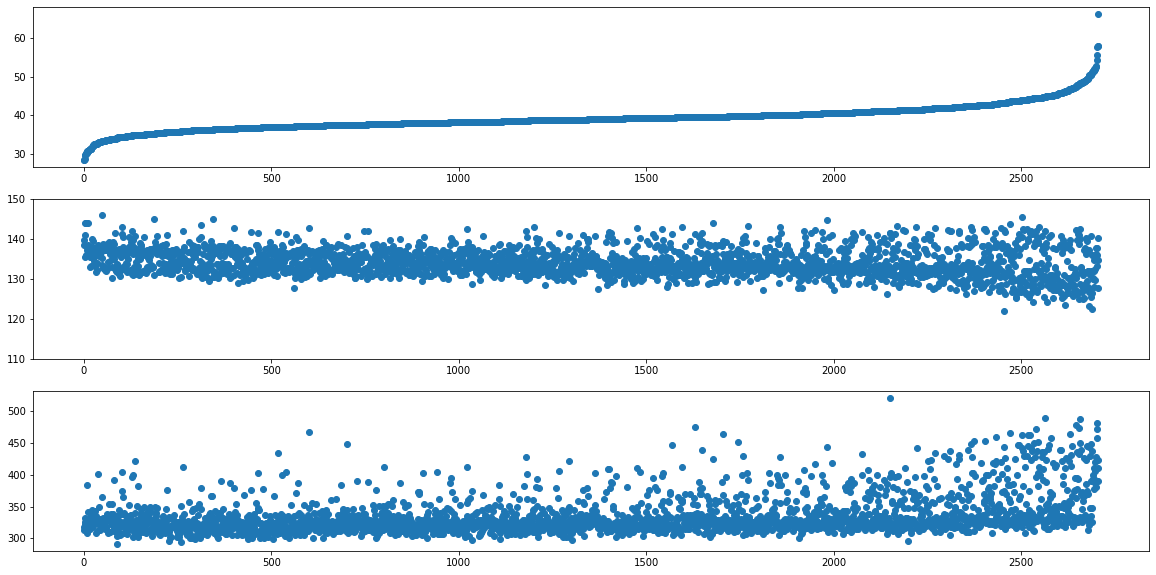

In [ ]:
fig, axs = plt.subplots(3, 1, figsize = (20, 10))

axs[0].scatter(np.arange(length), data['RVP'])
axs[1].scatter(np.arange(length), data['T'])
axs[1].set_ylim([110, 150])
axs[2].scatter(np.arange(length), data['P'])
plt.show()

In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr_ss = LinearRegression()
lr_ss.fit(train_scaled, train_target)
print(lr_ss.score(train_scaled, train_target))
print(lr_ss.score(test_scaled, test_target))
print(lr_ss.coef_)
print(lr_ss.intercept_)

0.5317208968504024
0.5310089998419306
[ 2398.72163168  -423.99687258 -2736.73795148   268.37331144
   293.40890974  1059.48834469  -200.82097858    52.10339964
  -114.50537629  -714.85475763   116.55771737]
39.303407224955066


In [ ]:
plt.figure(figsize = (30, 15))
plt.scatter(np.arange(length), data['RVP'], label = 'LAB', s = 1)
plt.scatter(np.arange(length), result, label = 'INFERENTIAL', color = 'orange')
plt.title('LinearRegression')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [81]:
data

,RVP,T,P
0,28.5,138.416083,312.828676
1,28.5,139.732698,317.068865
2,28.8,141.019403,322.464405
3,29.8,135.484870,331.948674
4,29.8,144.009999,325.051752
...,...,...,...
2702,55.5,136.123107,480.993079
2703,57.8,133.326625,457.893074
2704,58.0,127.676712,390.946907
2705,58.0,140.224060,423.020322


In [84]:
data_TP = data[['T', 'P']].sort_values(by = 'T').reset_index(drop = True, inplace = False)
data_TP

,T,P
0,97.606803,383.933984
1,105.749256,345.551803
2,122.103996,374.170016
3,122.406470,325.956086
4,123.287827,321.014425
...,...,...
2702,144.761030,443.124750
2703,144.928268,322.181066
2704,144.928268,322.181066
2705,145.441421,462.097329


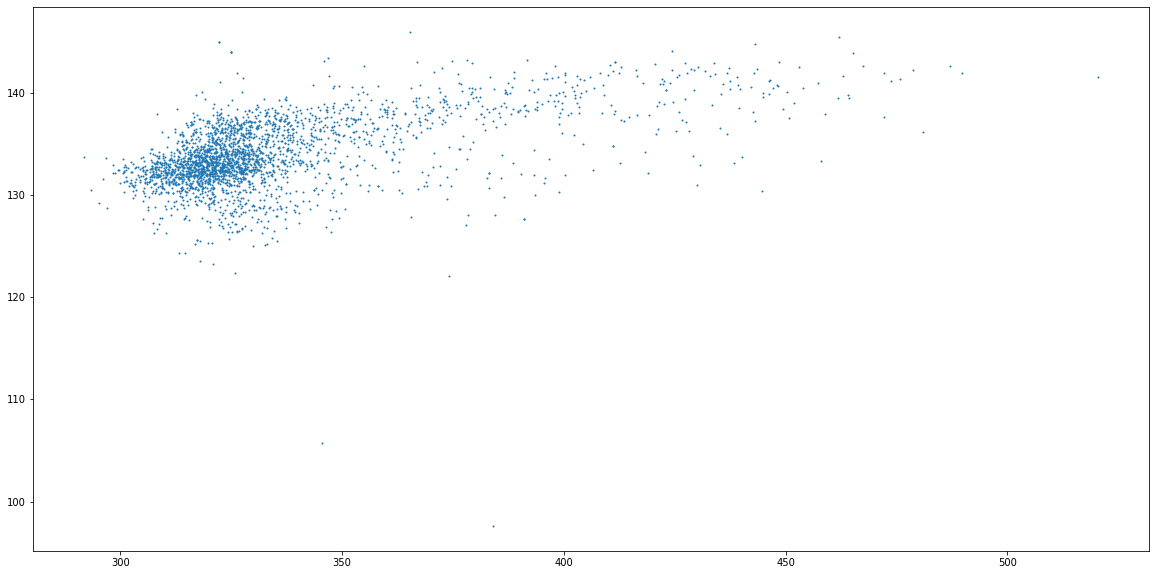

In [87]:
plt.figure(figsize = (20, 10))
plt.scatter(data_TP['P'], data_TP['T'], s = 1)
plt.show()

In [93]:
lr = LinearRegression()
lr.fit(data_TP['T'].to_numpy().reshape(-1, 1), data_TP['P'])
print(lr.score(data_TP['T'].to_numpy().reshape(-1, 1), data_TP['P']))

0.29986886751472974


In [94]:
a = lr.coef_
b = lr.intercept_
length = data.shape[0]
print(a, b, length)

[4.79447971] -307.32096270115215 2707


In [106]:
data_TP['T'].reshape(-1, 1)
data_TP['T'].shape

AttributeError: ignored

In [105]:
(a * data_TP['T'] + b).shape

(2707,)

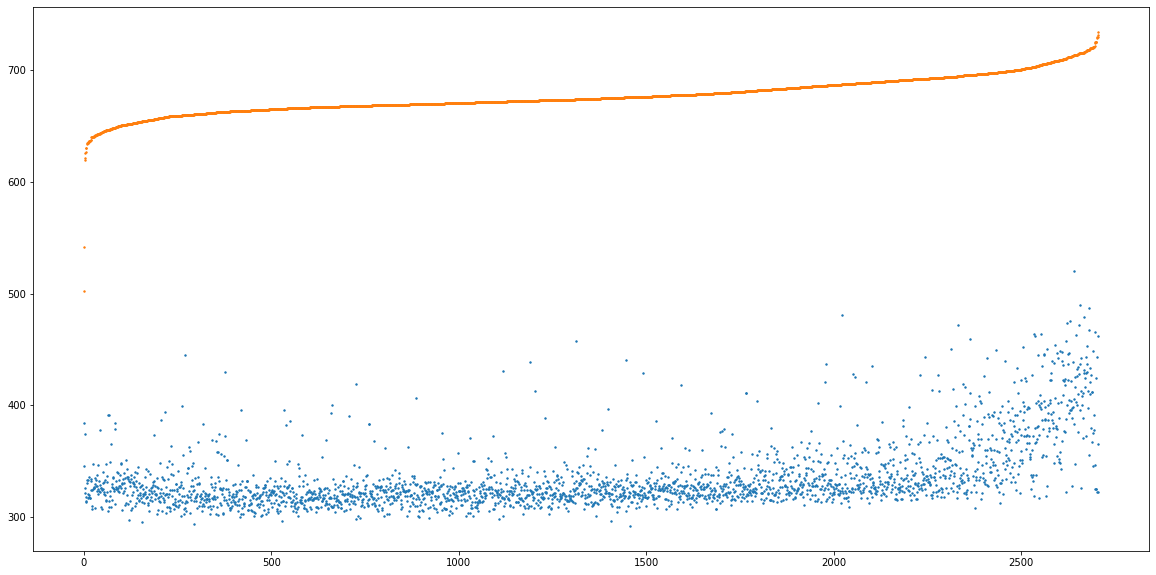

In [116]:
plt.figure(figsize = (20, 10))
plt.scatter(np.arange(length), data_TP['P'], s = 2)
plt.scatter(np.arange(length), a * data_TP['T'] + b, s = 2)
plt.show()

In [24]:
target_P

87      291.821242
259     293.520670
2199    295.237437
226     296.199502
1302    296.781484
           ...    
2646    478.627497
2702    480.993079
2656    487.060483
2564    489.844389
2150    520.512731
Name: P, Length: 2707, dtype: float64

In [25]:
input_T

array([[ 97.60680341],
       [105.749256  ],
       [122.1039958 ],
       ...,
       [144.9282677 ],
       [145.4414208 ],
       [145.9394168 ]])

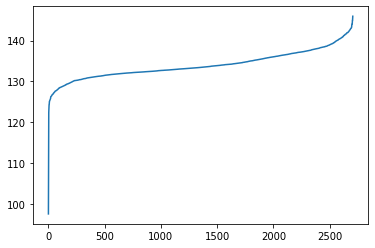

In [30]:
plt.plot(input_T)

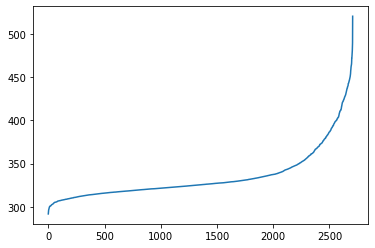

In [63]:
plt.plot(target_P)

In [32]:
target_P

87      291.821242
259     293.520670
2199    295.237437
226     296.199502
1302    296.781484
           ...    
2646    478.627497
2702    480.993079
2656    487.060483
2564    489.844389
2150    520.512731
Name: P, Length: 2707, dtype: float64

In [34]:
target_P.reset_index(drop = True, inplace = True)

In [36]:
target_P

0       291.821242
1       293.520670
2       295.237437
3       296.199502
4       296.781484
           ...    
2702    478.627497
2703    480.993079
2704    487.060483
2705    489.844389
2706    520.512731
Name: P, Length: 2707, dtype: float64